## Geocoding

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="Bing")
location = geolocator.geocode("Estación Biológica de Doñana, Sevilla")
print(location.address, "\n")
print((location.latitude, location.longitude), "\n")
print(location.raw)      

In [ ]:
locationR = geolocator.reverse("37.4020913, -6.0605527")
print(locationR.address, '"\n"')
print((locationR.latitude, location.longitude), "\n")
print(location.raw)

## Pyproj

In [ ]:
from pyproj import CRS
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

utm_crs_list = query_utm_crs_info(
    datum_name="WGS 84",
    area_of_interest=AreaOfInterest(
        west_lon_degree=-93.581543,
        south_lat_degree=42.032974,
        east_lon_degree=-93.581543,
        north_lat_degree=42.032974,
    ),
)
utm_crs = CRS.from_epsg(utm_crs_list[0].code)
utm_crs

In [ ]:
from pyproj import CRS

crs_4326 = CRS.from_epsg(4326)
crs_32629 = CRS.from_epsg(32629)

from pyproj import Transformer
transformer = Transformer.from_crs(crs_4326, crs_32629)
transformer = Transformer.from_crs(4326, 32629)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32629")

transformer.transform(37.83, -6.45)


In [ ]:
from pyproj import Geod
lats = [-72.9, -71.9, -74.9, -74.3, -77.5, -77.4, -71.7, -65.9, -65.7,
        -66.6, -66.9, -69.8, -70.0, -71.0, -77.3, -77.9, -74.7]
lons = [-74, -102, -102, -131, -163, 163, 172, 140, 113,
        88, 59, 25, -4, -14, -33, -46, -61]
geod = Geod(ellps="WGS84")
total_length = geod.line_length(lons, lats)
f"{total_length:.3f}"

## Shapely

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 5000.57)

In [2]:
point1.distance(point3D)

9.702882870569963

In [3]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 5000.57)


In [4]:
type(point3D)

shapely.geometry.point.Point

In [5]:
point1.geom_type

'Point'

In [6]:
# Get xy coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

In [7]:
# Read x and y coordinates separately
x = point1.x
y = point1.y

In [8]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [9]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {dist} units")

Distance between the points is 29.723559679150142 units


In [10]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [11]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [12]:
# Check if lines are identical
line == line2 

True

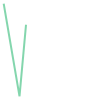

In [13]:
line

In [14]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [15]:
# Get xy coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [16]:
# Extract x and y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

In [17]:
for i in zip(xcoords, ycoords):
    print(i)

(2.2, 4.2)
(7.2, -25.1)
(9.26, -2.456)


In [18]:
list(line.xy)[0]

array('d', [2.2, 7.2, 9.26])

In [19]:
type(xcoords)

list

In [20]:
list(line.xy[1])

[4.2, -25.1, -2.456]

In [21]:
# Get the lenght of the line
l_length = line.length
print(f"Length of our line: {l_length} units")

Length of our line: 52.46106912939557 units


In [22]:
# Get the centroid of the line
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


In [23]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

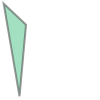

In [24]:
poly

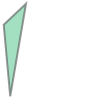

In [34]:
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x *-1, p.y] for p in [point1, point2, point3]]) #* -1 coords to flip
poly2

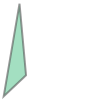

In [35]:
poly3 = Polygon([[p.x, p.y *-1] for p in [point1, point2, point3]]) #* -1 coords to flip
poly3

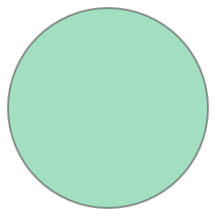

In [36]:
# Circle (using a buffer around a point)
point = Point((0,0))
pbf = point.buffer(100)
pbf

In [37]:
from shapely.geometry import box

In [38]:
# Specify the bbox extent (lower-left corner coordinates and upper-right corner coordinates)
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using Shapely
east_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Print object definition
print(east_poly)

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


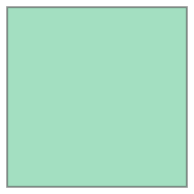

In [39]:
east_poly

In [40]:
# Import constructors for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# Print object definitions
print(multi_point)
print(multi_line)

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Print object definition
print(west_poly)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80))


In [41]:
# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly])

# Print object definition
print(multi_poly)

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


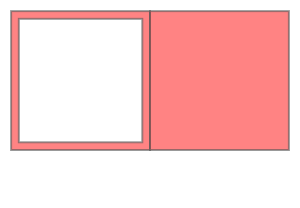

In [42]:
multi_poly.area
multi_poly

In [43]:
print(f"Is polygon valid?: {multi_poly.is_valid}")

Is polygon valid?: False


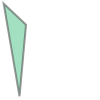

In [44]:
# Convex Hull (smallest polygon around the geometry collection)
mtcvh = multi_point.convex_hull
mtcvh

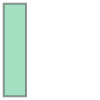

In [45]:
# Envelope (smalles rectangular polygon around the geometry collection): 
mtenve = multi_point.envelope
mtenve

## Operaciones Geométricas

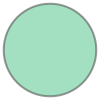

In [46]:
p1 = Point([0,0]).buffer(1)
p1#.centroid

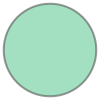

In [47]:
p2 = Point([0.5,0.5]).buffer(1)
p2

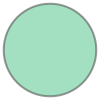

In [48]:
p3 = Point([0,1]).buffer(1)
p3

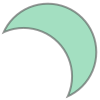

In [49]:
p2.difference(p1)#.difference(p3)

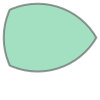

In [50]:
p1.intersection(p2).intersection(p3)

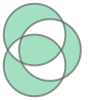

In [51]:
p1.symmetric_difference(p2).symmetric_difference(p3)

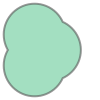

In [52]:
p1.union(p2).union(p3)

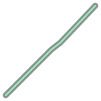

In [53]:
line = LineString([(-45,-45),(1,1),(10,8), (45, 45)])
lbf = line.buffer(5)
lbfintern = lbf.buffer(-3)
lbfintern

In [54]:
lbf.contains(lbfintern)

True

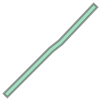

In [55]:
lbf_r = line.buffer(5, single_sided=True)
lbf_r
lbf_i = line.buffer(-5, single_sided=True)
lbf_i

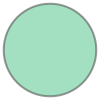

In [56]:
p4 = Point([0,0]).buffer(20)
p4

In [57]:
buff_line = line.buffer(0.000001)  #is polygon

# the `difference` operation between 2 polygons
multi_pgon = p4.difference(buff_line)

In [58]:
from shapely import affinity
line = LineString([(1, 3), (1, 1), (4, 1)])
rotated_a = affinity.rotate(line, 45)
rotated_b = affinity.rotate(line, -45, origin='centroid')

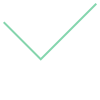

In [59]:
rotated_a

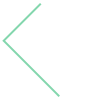

In [60]:
rotated_b

In [108]:
triangle = Polygon([(1, 1), (2, 3), (3, 1)])
triangle_a = affinity.scale(triangle, xfact=1.5, yfact=5)

#Así podemos capturar los puntos de nuestros polígonos
print(triangle_a.exterior.coords[:])

triangle_b = affinity.scale(triangle, xfact=2, origin=(1,1))
triangle_b.exterior.coords[:]

triangle_c = Polygon([[p.x *-1, p.y] for p in triangle_a.exterior.coords[:]])

[Point(i).x, Point(i).y for i in triangle_a.exterior.coords[:]]

triangle_a

SyntaxError: invalid syntax (201375155.py, line 12)

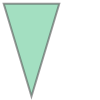

In [112]:
ll = []

for i in triangle_a.exterior.coords[:]:
    
    ll.append((Point(i).x * -2, Point(i).y * -1))
    
Polygon(ll)

In [104]:
[Point(i).x, Point(i).y for i in triangle_a.exterior.coords[:]]

SyntaxError: did you forget parentheses around the comprehension target? (3298505426.py, line 1)

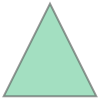

In [89]:
triangle

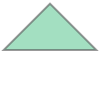

In [90]:
triangle_b

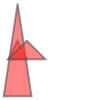

In [91]:
# Podemos jugar con las geometrías y desplazarlas como queramos
multi_triangle = MultiPolygon([triangle, triangle_a, triangle_b])
multi_triangle

In [69]:
import random
lrotated = []
lrotated_scaled = []

#Entramos en un bucle de valores para rotar nuestro polígono
for i in range(0, 360, 30):
    
    a = affinity.rotate(triangle, i)
    lrotated.append(a)
    
    # Si queremos podemos combinarlo con un scale
    # Creamos unas variables aleatorias para ello
    xfact = random.randint(0,3)
    yfact = random.randint(0,3)
    origin = (random.uniform(0,1), random.uniform(0,1))
    b = affinity.scale(a, xfact=xfact, yfact=yfact, origin=origin)
    lrotated_scaled.append(b)
                
multi_triangleA = MultiPolygon(lrotated)
multi_triangleB = MultiPolygon(lrotated_scaled)

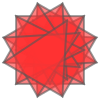

In [70]:
multi_triangleA

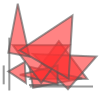

In [71]:
multi_triangleB

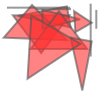

In [73]:
affinity.rotate(multi_triangleB, -180)

## Uso de pyproj para transformar coordenadas

In [113]:
import pyproj

from shapely import Point
from shapely.ops import transform

wgs84_pt = Point(-6.2495, 37.0886)

wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:32629')

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
utm_point = transform(project, wgs84_pt)
utm_point.coords[0]

(744470.2591062026, 4108241.3403015095)

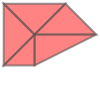

In [76]:
from shapely.ops import triangulate
points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
a = MultiPolygon(triangulate(points))
a

MULTILINESTRING ((0 0, 1 1), (1 1, 2 2))


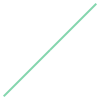

In [87]:
from shapely.ops import split
pt = Point((1, 1))
line = LineString([(0,0), (2,2)])
result = MultiLineString(split(line, pt))
print(result)
result

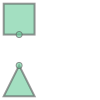

In [132]:
from shapely.ops import nearest_points
from shapely import LineString, Point, GeometryCollection

triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
rsquare = affinity.rotate(square, 25)
npoints = nearest_points(triangle, square)

GeometryCollection([triangle, square, npoints[0], npoints[1]])

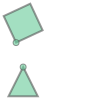

In [133]:
from shapely.ops import nearest_points
from shapely import LineString, Point, GeometryCollection

triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
rsquare = affinity.rotate(square, 25)
npoints = nearest_points(triangle, rsquare)

GeometryCollection([triangle, rsquare, npoints[0], npoints[1]])

In [136]:
import geopandas as gpd

from shapely.geometry import Polygon

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

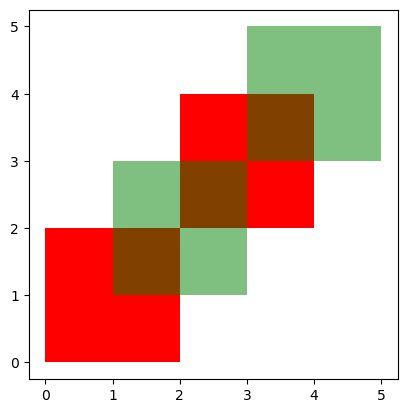

In [137]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5)

In [138]:
res_union = df1.overlay(df2, how='union')
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
5,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
6,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


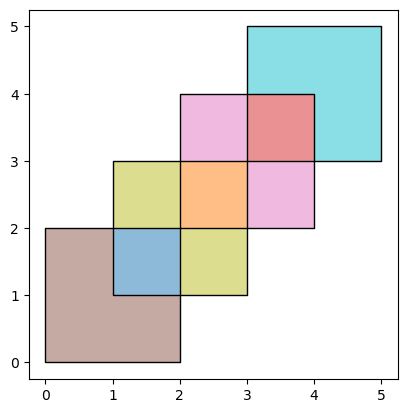

In [139]:
ax = res_union.plot(alpha=0.5, cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [140]:
res_intersection = df1.overlay(df2, how='intersection')

res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."


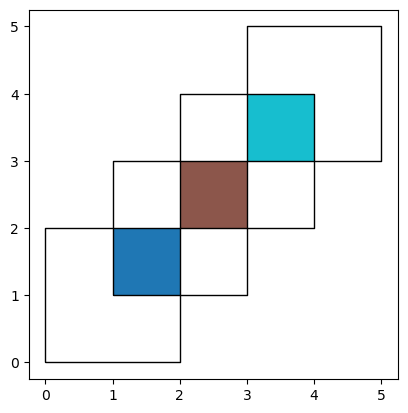

In [141]:
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')

df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [142]:
res_symdiff = df1.overlay(df2, how='symmetric_difference')

res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
1,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
2,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
3,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


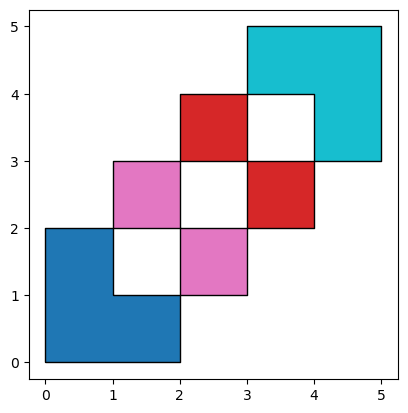

In [143]:
ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')

df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [144]:
res_difference = df1.overlay(df2, how='difference')

res_difference

,geometry,df1
0,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....",1
1,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000...",2


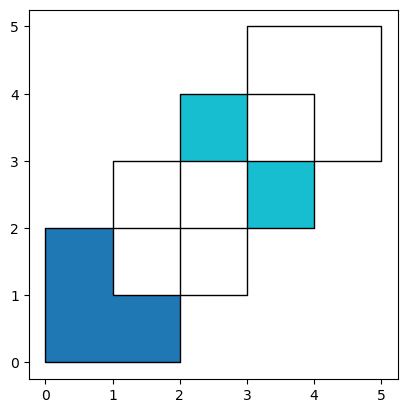

In [145]:
ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

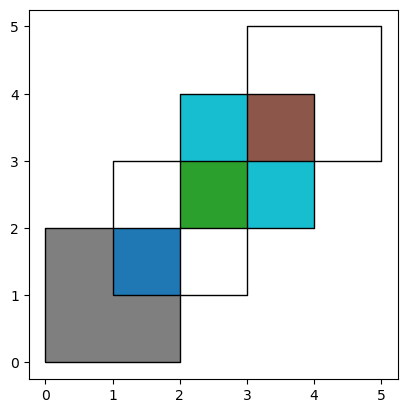

In [146]:
res_identity = df1.overlay(df2, how='identity')

res_identity

ax = res_identity.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

## Geopandas

In [279]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Read file from Shapefile
fp = "/media/diego/Datos3/EBD/Cursos/AETPython/Dia3/Data/fincas_ETRS89.shp"
data = gpd.read_file(fp)

# Write to Shapefile (just make a copy)
outfp = "/media/diego/Datos3/EBD/Cursos/AETPython/Dia3/fincas_ECOPY.shp"
data.to_file(outfp)

In [236]:
# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [237]:
data.tail(10)

,OBJECTID,FINCA,TITULARIDA,Hectareas,Shape_Leng,Shape_Area,geometry
47,48,EL ALAMILLO,Privada,254.628778,7722.362318,2.549535e+06,"POLYGON ((718959.190 4104630.136, 718695.311 4..."
48,49,EL ALAMO,Privada,297.044962,10706.146127,2.974343e+06,"POLYGON ((717361.512 4106458.082, 717246.237 4..."
49,50,PINAR DE LA ALGAIDA,Pública,685.703321,13928.018263,6.861925e+06,"POLYGON ((741926.482 4084944.114, 741948.944 4..."
50,51,MELO,Privada,28.087980,2570.268764,2.811154e+05,"POLYGON ((734270.724 4124336.478, 734298.143 4..."
51,52,EL TARELO,Privada,18.576710,1732.986178,1.859064e+05,"POLYGON ((738991.062 4081073.106, 738718.048 4..."
52,53,ENTREMUROS,Pública,1998.423172,51669.775015,1.999548e+07,"POLYGON ((748071.228 4118589.473, 748086.378 4..."
53,54,HUERTA TEJADA,Pública,57.448239,3152.434654,5.748522e+05,"POLYGON ((742617.832 4106620.946, 742547.953 4..."
54,55,COTO II HATO RATON,Privada,200.356512,8054.632269,2.005087e+06,"POLYGON ((737151.852 4116622.931, 737141.702 4..."
55,56,MARISMA PINAR ALGAIDA,Privada,2760.857409,27955.520432,2.762966e+07,"POLYGON ((741857.381 4085200.940, 741973.788 4..."
56,57,CASA NIEVES,Pública,239.369364,8451.685401,2.394841e+06,"POLYGON ((747703.729 4120759.506, 747710.988 4..."


In [238]:
data.columns.values

array(['OBJECTID', 'FINCA', 'TITULARIDA', 'Hectareas', 'Shape_Leng',
       'Shape_Area', 'geometry'], dtype=object)

In [239]:
data_ = data[['FINCA', 'TITULARIDA',  'geometry']]
x = data_['geometry'][1].centroid.coords[0][0]
y = data_['geometry'][1].centroid.coords[0][1]

p = Point([x,y])
print(p)

POINT (722676.2396271033 4111381.9281381364)


In [240]:
colnames = {'FINCA':'FINCAS', 'TITULARIDA':'TITULARIDAD'}
data_.rename(columns=colnames, inplace=True)

/tmp/ipykernel_10470/3353274282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_.rename(columns=colnames, inplace=True)


In [153]:
data_

,FINCAS,TITULARIDAD,geometry
0,ROCINA,Pública,"POLYGON ((711956.851 4116309.675, 711959.785 4..."
1,MANECORRO,Pública,"POLYGON ((722974.231 4111420.866, 722964.460 4..."
2,MADRE,Pública,"POLYGON ((724385.301 4111693.064, 724395.333 4..."
3,SOTOS DE DOÑANA,Pública,"POLYGON ((726144.117 4107988.363, 725909.165 4..."
4,MATASGORDA Y CAÑADA MAYOR,Pública,"POLYGON ((730937.401 4112839.843, 730957.771 4..."
5,EL PINTO,Pública,"POLYGON ((725229.710 4112748.784, 725232.349 4..."
6,LOS MIMBRALES,Pública,"POLYGON ((722737.791 4109654.558, 722751.408 4..."
7,NAJARSA,Pública,"POLYGON ((721395.743 4106339.047, 721380.338 4..."
8,ACEBUCHE,Pública,"POLYGON ((717239.516 4100790.677, 716886.541 4..."
9,CASA DE LOS GUARDAS,Pública,"POLYGON ((726540.863 4106867.176, 726394.147 4..."


In [242]:
print("Number of rows", len(data_['FINCAS']))
print("Number of classes", data_['TITULARIDAD'].nunique())
#print("Number of groups", data['GROUP'].nunique())

Number of rows 57
Number of classes 3


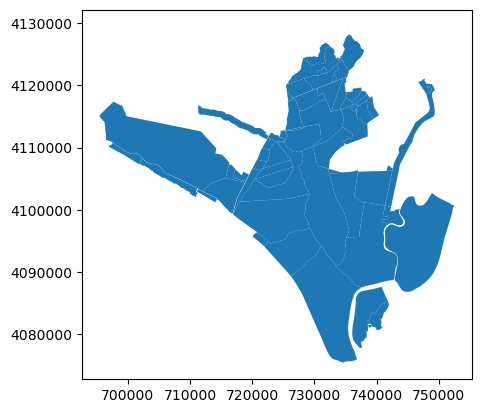

In [241]:
data_.plot()

In [243]:
data_['geometry'].head()

0    POLYGON ((711956.851 4116309.675, 711959.785 4...
1    POLYGON ((722974.231 4111420.866, 722964.460 4...
2    POLYGON ((724385.301 4111693.064, 724395.333 4...
3    POLYGON ((726144.117 4107988.363, 725909.165 4...
4    POLYGON ((730937.401 4112839.843, 730957.771 4...
Name: geometry, dtype: geometry

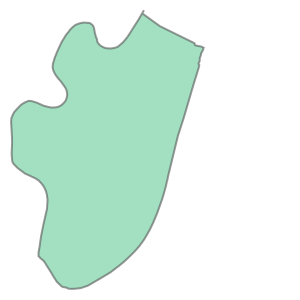

In [244]:
# Access the geometry on the first row of data
Vetalapalma = data.at[46, "geometry"]
Vetalapalma

In [290]:
data[data['TITULARIDA'] == 'Privada']

,OBJECTID,FINCA,TITULARIDA,Hectareas,Shape_Leng,Shape_Area,geometry
15,16,RESERVA DEL GUADIAMAR,Privada,3270.235540,29580.388955,3.272920e+07,"POLYGON ((736998.895 4106084.703, 736974.842 4..."
19,20,EL PUNTAL,Privada,3776.322070,25988.854805,3.780311e+07,"POLYGON ((729447.778 4096585.701, 729539.584 4..."
26,27,COTO I HATO RATON,Privada,154.335914,5964.738530,1.544511e+06,"POLYGON ((737181.920 4116650.437, 737151.852 4..."
27,28,HATO BLANCO NUEVO,Privada,1522.958743,22578.543999,1.524160e+07,"POLYGON ((736286.140 4116804.600, 735852.279 4..."
29,30,EL CORTIJILLO,Privada,117.584878,4947.058942,1.176923e+06,"POLYGON ((731975.705 4121897.955, 731928.290 4..."
30,31,LAS ENCANTADAS,Privada,967.105740,14508.340329,9.680477e+06,"POLYGON ((731834.084 4117749.706, 731486.504 4..."
31,32,MARISMA Y LOMO DEL GRULLO,Privada,2702.468829,27085.832008,2.704948e+07,"POLYGON ((732601.916 4115956.672, 732510.918 4..."
33,34,LA TORERA,Privada,202.121467,6697.453686,2.022864e+06,"POLYGON ((735920.568 4117389.378, 736020.143 4..."
34,35,LAS MULAS,Privada,1042.053888,23672.978440,1.042926e+07,"MULTIPOLYGON (((734321.741 4116143.165, 734049..."
35,36,CATERRE,Privada,984.905502,19851.945125,9.857727e+06,"MULTIPOLYGON (((733935.339 4119258.822, 733772..."


In [296]:
data_sampled_points = data.sample_points(100)
data_sampled_points_sel = data[data['TITULARIDA'] == 'Privada'].sample_points(100)
m = data.explore()
data_sampled_points.explore(m=m, color='green')
data_sampled_points_sel.explore(m=m, color='red')

In [301]:
data_sampled_points_sel = data[data['TITULARIDA'] == 'Privada'].sample_points(50)
m = data.explore()
data_sampled_points_sel.explore(m=m, color='red')

In [302]:
data_sampled_points_sel.to_file('/media/diego/Datos3/EBD/Cursos/AETPython/Dia4/fincas_privadas_rpoints.shp')

In [246]:
# Print information about the area 
print("Area:", round(data_.at[0, "geometry"].area, 0), "metros cuadrado")

Area: 12360654.0 metros cuadrado


In [247]:
# Iterate over rows and print the area of a Polygon
for index, row in data[:].iterrows():
    
    # Get the area from the shapely-object stored in the geometry-column
    finca = row['FINCA']
    poly_area = row['geometry'].area / 10000
    
    # Print info
    print("El área de la finca {} is: {:.0f} hectareas".format(finca, poly_area))

El área de la finca ROCINA is: 1236 hectareas
El área de la finca MANECORRO is: 15 hectareas
El área de la finca MADRE is: 206 hectareas
El área de la finca SOTOS DE DOÑANA is: 898 hectareas
El área de la finca MATASGORDA Y CAÑADA MAYOR is: 1834 hectareas
El área de la finca EL PINTO is: 64 hectareas
El área de la finca LOS MIMBRALES is: 301 hectareas
El área de la finca NAJARSA is: 238 hectareas
El área de la finca ACEBUCHE is: 1938 hectareas
El área de la finca CASA DE LOS GUARDAS is: 698 hectareas
El área de la finca EL LOBO is: 977 hectareas
El área de la finca ALGAIDA Y MOGEAS is: 3586 hectareas
El área de la finca RESERVA BIOLOGICA DE DOÑANA is: 6109 hectareas
El área de la finca MARISMA DE HINOJOS is: 7957 hectareas
El área de la finca PARCELA FAO is: 93 hectareas
El área de la finca RESERVA DEL GUADIAMAR is: 3270 hectareas
El área de la finca EL MATOCHAL is: 673 hectareas
El área de la finca LAS NUEVAS is: 7712 hectareas
El área de la finca LAS MARISMILLAS is: 10501 hectareas
E

In [248]:
# Asi podemos obtener los valores mayores, menores, medios, etc... de un campo 
# y también que nos devuelva todos los valores de la fila en la que se den
# Podemos hacer todos los calculos sobre la geometría sin tener que crear un campo area

print('Área Máxima del shape:', data['geometry'].area.max())
print('Área Mínima del shape:', data['geometry'].area.min())
print('Área media del shape:', data['geometry'].area.mean())
      
print('El área máxima está en la finca:')     
data.loc[data['geometry'].area.idxmax()]

Área Máxima del shape: 154109612.60126942
Área Mínima del shape: 6398.784179243257
Área media del shape: 18516807.639097348
El área máxima está en la finca:


OBJECTID                                                     46
FINCA                                                  ABALARIO
TITULARIDA                                              Pública
Hectareas                                          15411.208015
Shape_Leng                                        103587.704495
Shape_Area                                        154356611.453
geometry      MULTIPOLYGON (((714354.6916920971 4101673.8056...
Name: 45, dtype: object

In [249]:
# Así podemos crear crear y rellenar un campo basado en el campo geometry (geometría de shapely)
data['area'] = data.area/10000
data

,OBJECTID,FINCA,TITULARIDA,Hectareas,Shape_Leng,Shape_Area,geometry,area
0,1,ROCINA,Pública,1236.081506,27352.769977,1.237685e+07,"POLYGON ((711956.851 4116309.675, 711959.785 4...",1236.065432
1,2,MANECORRO,Pública,14.817218,1510.912287,1.483424e+05,"POLYGON ((722974.231 4111420.866, 722964.460 4...",14.817036
2,3,MADRE,Pública,206.099286,6840.495031,2.063299e+06,"POLYGON ((724385.301 4111693.064, 724395.333 4...",206.096718
3,4,SOTOS DE DOÑANA,Pública,898.463463,13851.372449,8.994692e+06,"POLYGON ((726144.117 4107988.363, 725909.165 4...",898.452757
4,5,MATASGORDA Y CAÑADA MAYOR,Pública,1833.774088,17752.935873,1.835615e+07,"POLYGON ((730937.401 4112839.843, 730957.771 4...",1833.753790
5,6,EL PINTO,Pública,63.837609,7276.274695,6.390306e+05,"POLYGON ((725229.710 4112748.784, 725232.349 4...",63.836889
6,7,LOS MIMBRALES,Pública,300.897246,6894.974496,3.012499e+06,"POLYGON ((722737.791 4109654.558, 722751.408 4...",300.893791
7,8,NAJARSA,Pública,237.543638,6245.137985,2.378271e+06,"POLYGON ((721395.743 4106339.047, 721380.338 4...",237.540830
8,9,ACEBUCHE,Pública,1937.584700,18885.392107,1.940180e+07,"POLYGON ((717239.516 4100790.677, 716886.541 4...",1937.555045
9,10,CASA DE LOS GUARDAS,Pública,698.273021,14624.748121,6.990614e+06,"POLYGON ((726540.863 4106867.176, 726394.147 4...",698.264933


In [250]:
# Seleccionamos una clase 
selection = data_.loc[data_["TITULARIDAD"]=="Privada"]

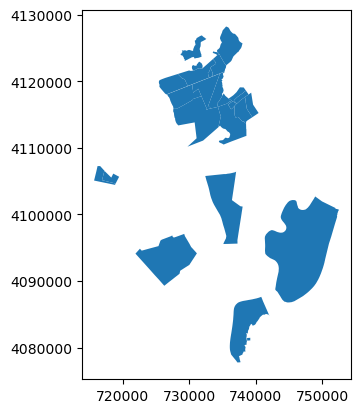

In [251]:
selection.plot()

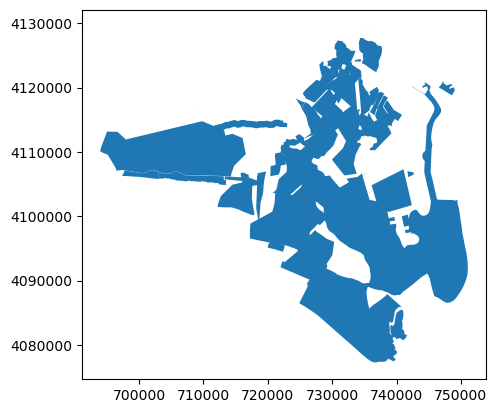

In [254]:
# Podemos usar los métodos de shapely en nuestros geodataframes
data.rotate(25).plot()

In [270]:
# Ejemplo de lectura de un mapa desde la web
url = "https://raw.githubusercontent.com/Digdgeo/AEPython/main/Dia4/fincas_ETRS89.geojson"
df = gpd.read_file(url2)
df

,OBJECTID,FINCA,TITULARIDA,Hectareas,Shape_Leng,Shape_Area,geometry
0,1,ROCINA,Pública,1236.081506,27352.769977,1.237685e+07,"POLYGON ((711956.85066 4116309.67494, 711959.7..."
1,2,MANECORRO,Pública,14.817218,1510.912287,1.483424e+05,"POLYGON ((722974.23079 4111420.86583, 722964.4..."
2,3,MADRE,Pública,206.099286,6840.495031,2.063299e+06,"POLYGON ((724385.30111 4111693.06439, 724395.3..."
3,4,SOTOS DE DOÑANA,Pública,898.463463,13851.372449,8.994692e+06,"POLYGON ((726144.11692 4107988.36262, 725909.1..."
4,5,MATASGORDA Y CAÑADA MAYOR,Pública,1833.774088,17752.935873,1.835615e+07,"POLYGON ((730937.40133 4112839.84269, 730957.7..."
5,6,EL PINTO,Pública,63.837609,7276.274695,6.390306e+05,"POLYGON ((725229.71019 4112748.78436, 725232.3..."
6,7,LOS MIMBRALES,Pública,300.897246,6894.974496,3.012499e+06,"POLYGON ((722737.79073 4109654.55836, 722751.4..."
7,8,NAJARSA,Pública,237.543638,6245.137985,2.378271e+06,"POLYGON ((721395.74301 4106339.04702, 721380.3..."
8,9,ACEBUCHE,Pública,1937.584700,18885.392107,1.940180e+07,"POLYGON ((717239.51584 4100790.67737, 716886.5..."
9,10,CASA DE LOS GUARDAS,Pública,698.273021,14624.748121,6.990614e+06,"POLYGON ((726540.86266 4106867.17629, 726394.1..."


In [271]:
df['geometry'] = data['geometry'].rotate(15)
df['geometry'] = data['geometry'].scale(1.15, 1.05, origin='centroid')

In [273]:
df.to_file('/media/diego/Datos3/EBD/Cursos/AETPython/Dia4/fincas_affinity_gj.shp')

In [275]:
municipios = '/media/diego/Datos3/EBD/Cursos/AETPython/Dia4/13_Limites_Administrativos/13_01_TerminoMunicipal.shp'

munis = gpd.read_file(municipios)

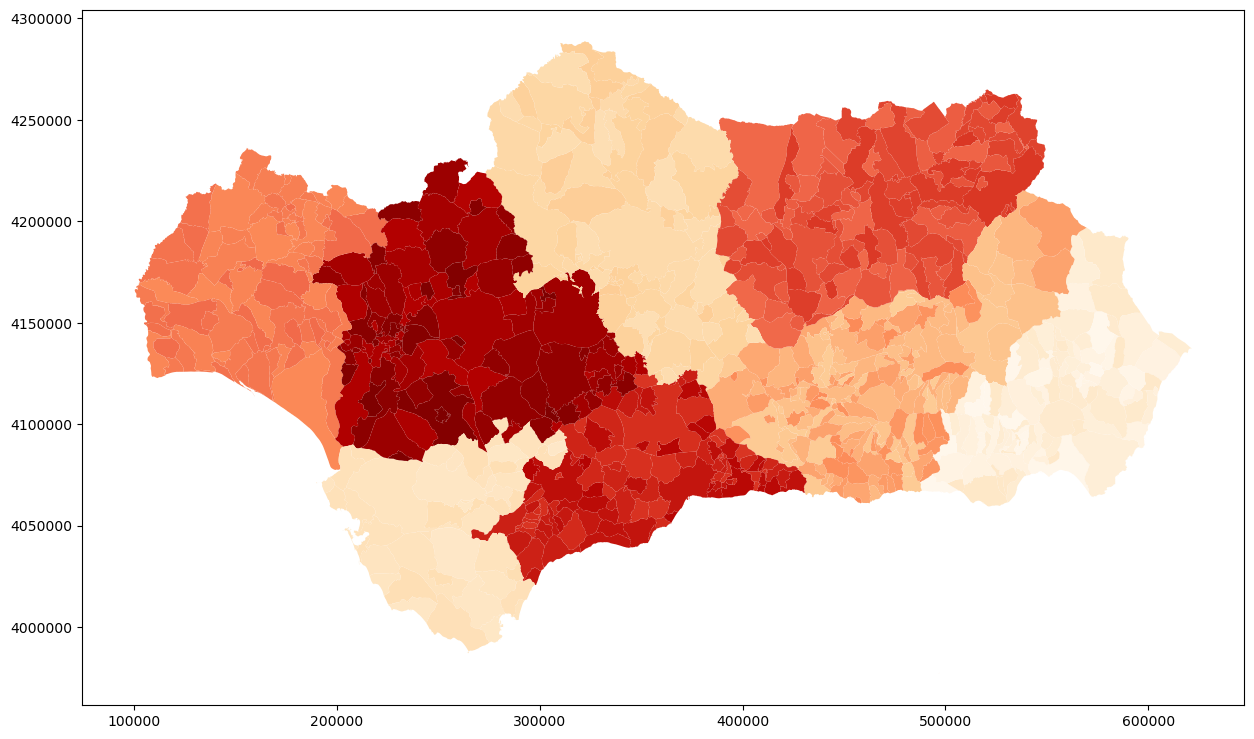

In [303]:
munis.plot(figsize=(15,10), column="cod_mun", cmap='OrRd')
plt.show()

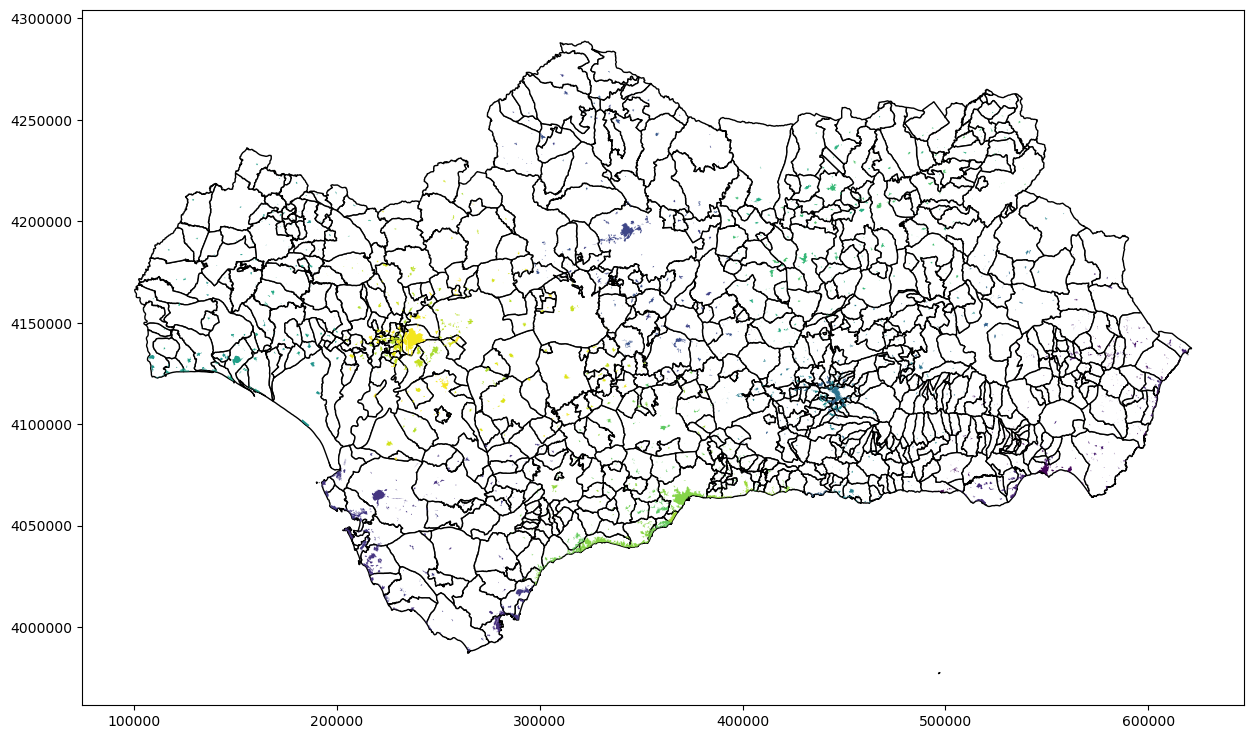

In [305]:
# Combinar 2 GPDs en la misma figura
cities = '/media/diego/Datos3/EBD/Cursos/AETPython/Dia4/7_Sistema_Urbano/07_01_NucleosUrbanos_pol.shp'
cities_ = gpd.read_file(cities)

base = munis.plot(color='white', edgecolor='black', figsize=(15,10))

#cities_.plot(ax=base, marker='o', color='red', markersize=5)
cities_.plot(ax=base, column="cod_mun", cmap='viridis')
plt.show()

In [306]:
# Podemos escribir y sobre escribir los valorestantas veces como queramos
munis.head()

,id_dera,cod_mun,nombre,provincia,area,geometry
0,1.131640e+13,11039,Vejer de la Frontera,Cádiz,264559983,"POLYGON ((223301.000 4015401.140, 223442.415 4..."
1,1.131640e+13,14065,La Victoria,Córdoba,19444664,"MULTIPOLYGON (((337364.723 4170694.744, 337200..."
2,1.131640e+13,14038,Lucena,Córdoba,352035823,"POLYGON ((352208.549 4132075.522, 352273.549 4..."
3,1.131640e+13,23005,Andújar,Jaén,964966346,"POLYGON ((394993.460 4230096.450, 394894.860 4..."
4,1.131640e+13,18911,Vegas del Genil,Granada,14136814,"POLYGON ((437453.000 4112743.200, 437333.939 4..."


In [307]:
munis['area'] = 0
munis.head()

,id_dera,cod_mun,nombre,provincia,area,geometry
0,1.131640e+13,11039,Vejer de la Frontera,Cádiz,0,"POLYGON ((223301.000 4015401.140, 223442.415 4..."
1,1.131640e+13,14065,La Victoria,Córdoba,0,"MULTIPOLYGON (((337364.723 4170694.744, 337200..."
2,1.131640e+13,14038,Lucena,Córdoba,0,"POLYGON ((352208.549 4132075.522, 352273.549 4..."
3,1.131640e+13,23005,Andújar,Jaén,0,"POLYGON ((394993.460 4230096.450, 394894.860 4..."
4,1.131640e+13,18911,Vegas del Genil,Granada,0,"POLYGON ((437453.000 4112743.200, 437333.939 4..."


In [308]:
munis['area'] = munis['geometry'].area / 10000
munis.head()

,id_dera,cod_mun,nombre,provincia,area,geometry
0,1.131640e+13,11039,Vejer de la Frontera,Cádiz,26480.386408,"POLYGON ((223301.000 4015401.140, 223442.415 4..."
1,1.131640e+13,14065,La Victoria,Córdoba,1944.191267,"MULTIPOLYGON (((337364.723 4170694.744, 337200..."
2,1.131640e+13,14038,Lucena,Córdoba,35191.622541,"POLYGON ((352208.549 4132075.522, 352273.549 4..."
3,1.131640e+13,23005,Andújar,Jaén,96439.681178,"POLYGON ((394993.460 4230096.450, 394894.860 4..."
4,1.131640e+13,18911,Vegas del Genil,Granada,1412.682691,"POLYGON ((437453.000 4112743.200, 437333.939 4..."


## Reproyectar gpds

In [309]:
munis.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European_Terrestrial_Reference_System_1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [314]:
# Vamos a reporyectar y a calcular las diferencias con el area en 29 y 30 de cada municipio

munis_29 = munis.to_crs(epsg=25829)
munis_29['area'] = munis_29['geometry'].area / 10000
munis.head()

,id_dera,cod_mun,nombre,provincia,area,geometry
0,1.131640e+13,11039,Vejer de la Frontera,Cádiz,26480.386408,"POLYGON ((223301.000 4015401.140, 223442.415 4..."
1,1.131640e+13,14065,La Victoria,Córdoba,1944.191267,"MULTIPOLYGON (((337364.723 4170694.744, 337200..."
2,1.131640e+13,14038,Lucena,Córdoba,35191.622541,"POLYGON ((352208.549 4132075.522, 352273.549 4..."
3,1.131640e+13,23005,Andújar,Jaén,96439.681178,"POLYGON ((394993.460 4230096.450, 394894.860 4..."
4,1.131640e+13,18911,Vegas del Genil,Granada,1412.682691,"POLYGON ((437453.000 4112743.200, 437333.939 4..."


In [315]:
munis_29['dif_area'] = munis['area'] - munis_29['area']

In [316]:
munis_29.head()

,id_dera,cod_mun,nombre,provincia,area,geometry,dif_area
0,1.131640e+13,11039,Vejer de la Frontera,Cádiz,26484.056816,"POLYGON ((762471.502 4014960.301, 762609.074 4...",-3.670409
1,1.131640e+13,14065,La Victoria,Córdoba,1949.315809,"MULTIPOLYGON (((866596.528 4177228.050, 866429...",-5.124542
2,1.131640e+13,14038,Lucena,Córdoba,35310.821757,"POLYGON ((883897.250 4139579.726, 883961.520 4...",-119.199216
3,1.131640e+13,23005,Andújar,Jaén,96866.495046,"POLYGON ((920370.286 4240324.355, 920269.204 4...",-426.813869
4,1.131640e+13,18911,Vegas del Genil,Granada,1420.298291,"POLYGON ((970378.347 4125662.400, 970263.279 4...",-7.615600


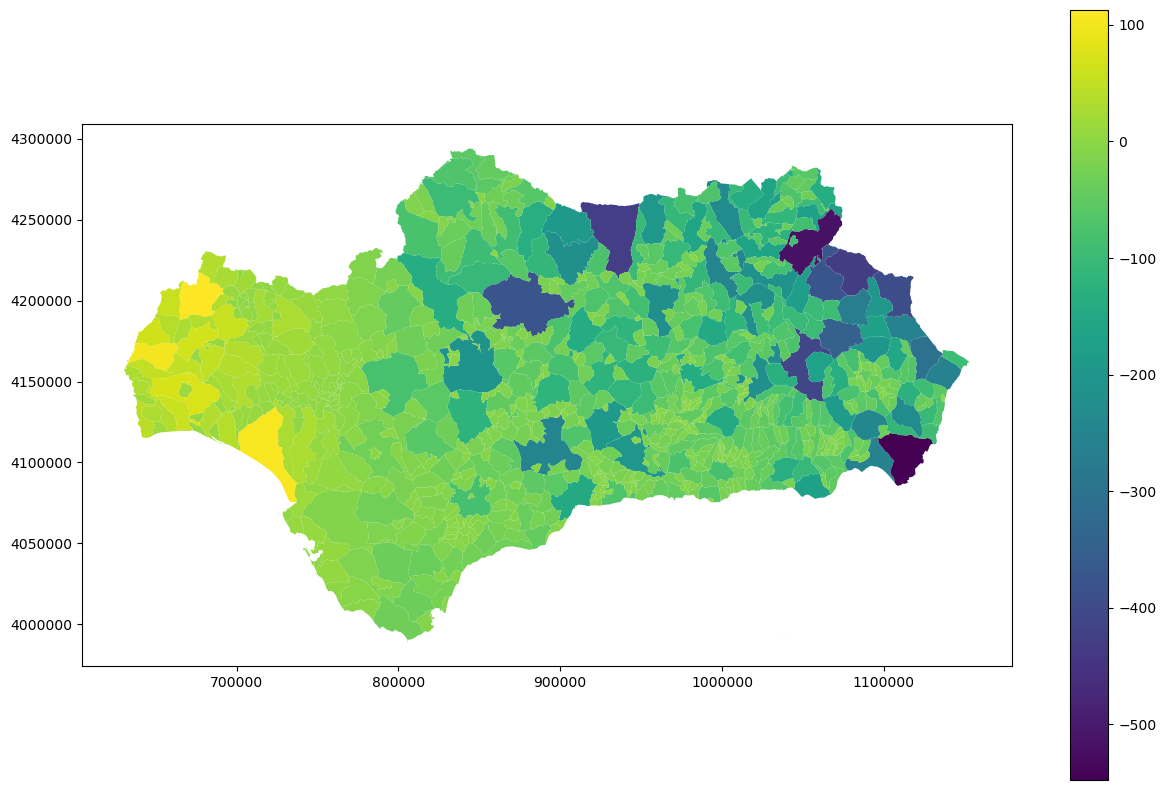

In [317]:
munis_29.plot('dif_area',legend=True, figsize=(15,10))
plt.show()

In [320]:
munis_29['dif_norm'] = munis_29.dif_area / munis_29.area * 100

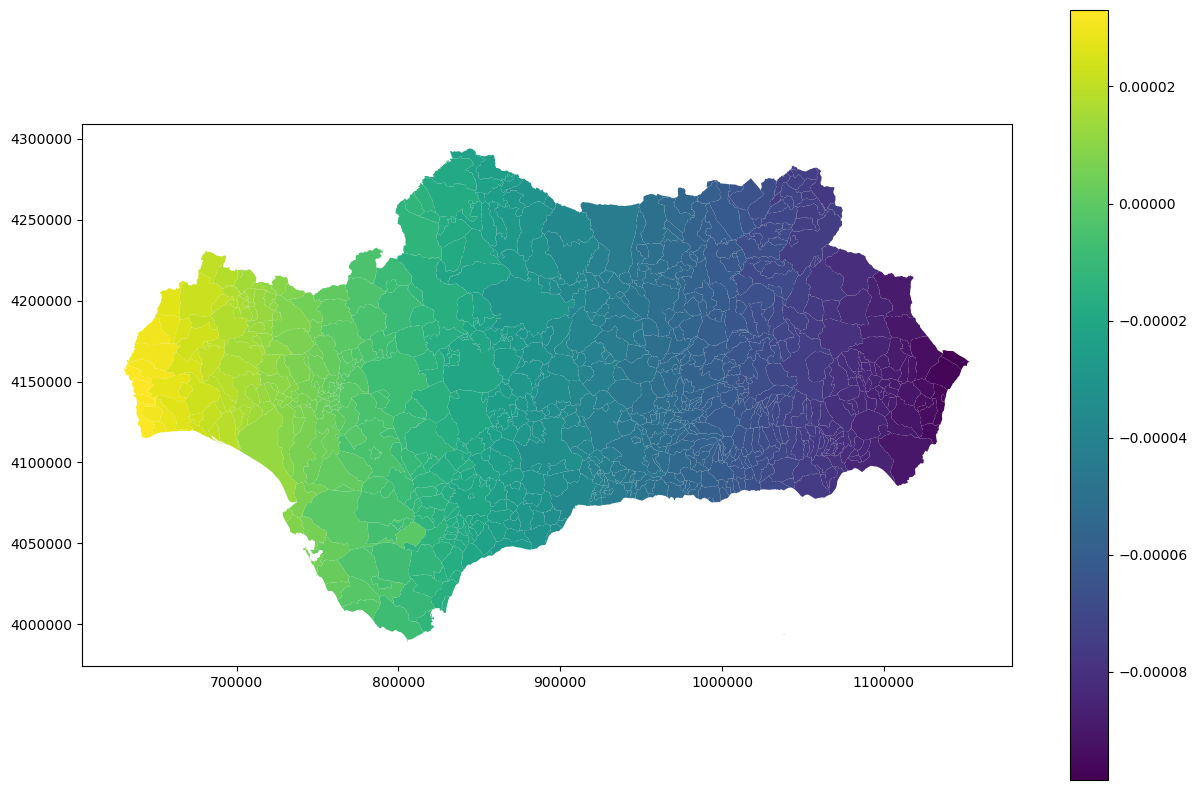

In [322]:
# Si la hacemos normalizada por el tamaño del municipio queda más claro
munis_29.plot('dif_norm',legend=True, figsize=(15,10))
plt.show()